## Data Analysis using Pandas




**What categories of passengers were most likely to survive the Titanic disaster?**

In order to determine the categories of passengers who were most likely to survive the Titanic disaster, I used the process of exploratory data analysis,  meaning the process of visualising and analysing data to extract insights.

First, I split all the features in the dataset into categorical and numerical variables and analysed them individually to see how each correlate with survival.

Categorical variables are Sex, Pclass and Embarked. Numerical vairables include SibSp, Parch, Age and Fare.

### Import libraries

In [9]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import and read data

In [11]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print("Training set shape: ",train.shape)

Training set shape:  (891, 12)


### Data types, missing data and summary statistics

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Age, Cabin and Embarked columns have missing data.

### Question 2: List of attributes I have used: Age, Embarked, Survived, Pclass, Sex, SibSp, Parch, Fare

### Feature Analysis
#### Categorical variable: Sex

In [18]:
train['Sex'].value_counts(dropna = False)

# There are more male passengers than females on titanic.

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
# Mean of survival by sex
train[['Sex','Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival probability by gender')

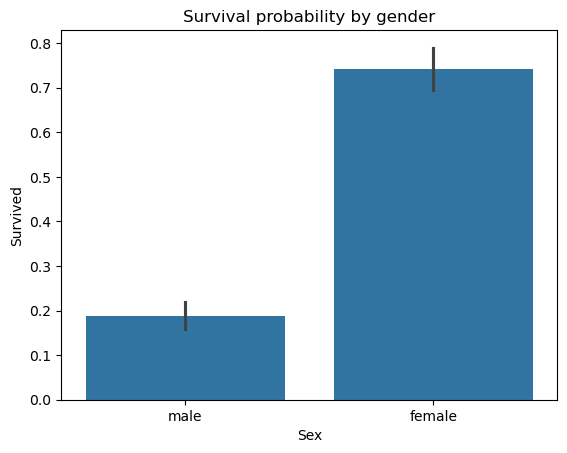

In [20]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.title('Survival probability by gender')

Insights gathered: Female passengers are far more likely to survive than male passengers. In the movie, women and children were prioritised durign the evacuation of the Titanic so it makes sense that women have a higher chance of survival than men.

#### Categorical variable: Pclass

In [23]:
train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
# Mean of survival by passenger class

train[['Pclass','Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival probability by passenger class')

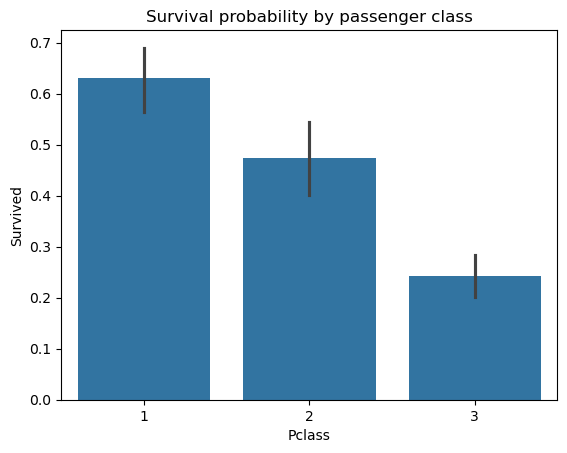

In [25]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.title('Survival probability by passenger class')

First-class passengers were more likely to survive than second class passengers and second class passengers were more likely to survive than third-class passengers so individuals with high social status, influence and wealth were prioritised.

Text(0.5, 1.0, 'Survival probability by sex and passenger class')

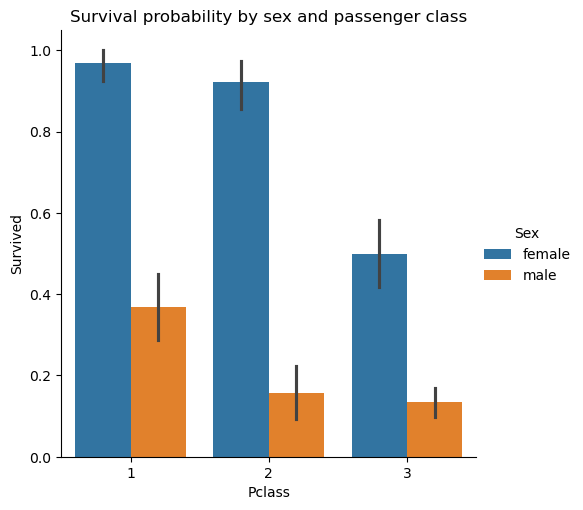

In [27]:
# Survival by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
plt.title('Survival probability by sex and passenger class')

#### Categorical variable: Embarked

In [29]:
train['Embarked'].value_counts(dropna = False)

# Two missing values in the Embarked column

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [30]:
# Mean of survival by passenger class

train[['Embarked','Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability by point of embarkation')

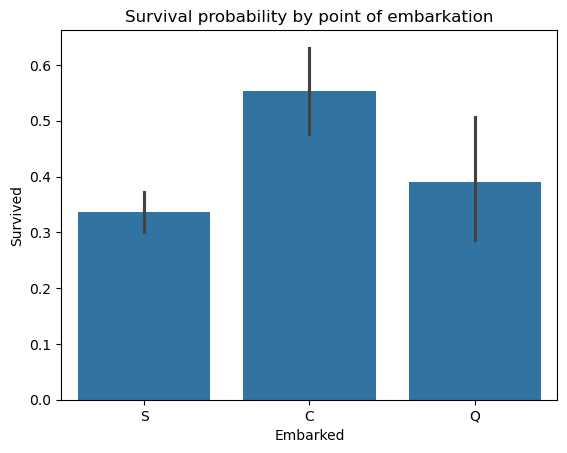

In [31]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.title('Survival probability by point of embarkation')

Survival probability is highest for location C and lowest for location S.

We can make a hypothesis whereby majority of the first class passengers have embarked from location C and since they have hughest survival probability, this has resulted in location C having highest survival probability. Similarly, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this caused location S to have the lowest survival probability. We can test this hypothesis.

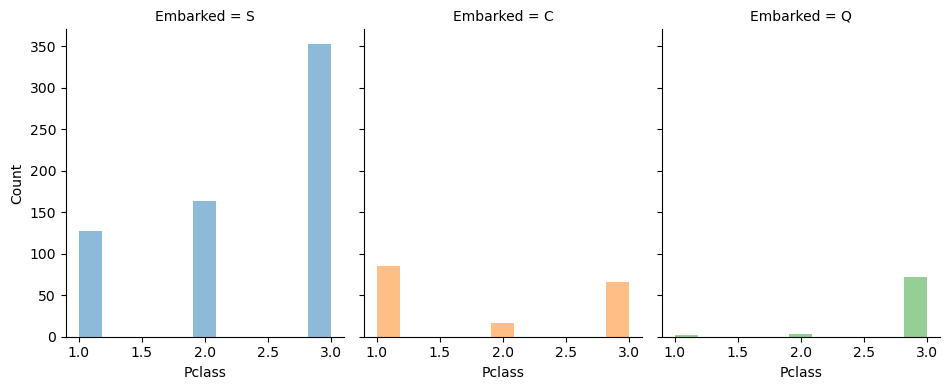

In [33]:
sns.displot(data = train,  x = 'Pclass', hue = 'Embarked', col = 'Embarked',height=4, aspect=.8, legend = False, linewidth = 0)

Hypothesis appears to be true, Location S has the most third class passengers whereas location C has the most first class passengers.

### Numerical variables

In [36]:
## Detect and removing outliers

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers
    
outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("Dropping these {} indices: ".format(len(outliers_to_drop)),outliers_to_drop)

Dropping these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [37]:
train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [38]:
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


### Numerical variable correlation with survival

<Axes: >

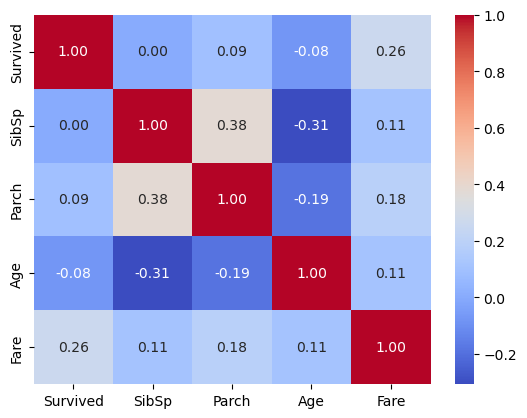

In [40]:
 sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot = True, fmt = '.2f' , cmap = 'coolwarm')

#Fare seems to be the only feature that has a substantial correlation with survival.

Fare is the most positively correlated numerical feature to survival. The more a passenger pays for their ticket, the more likely he/she is at surviving.

### Numerical variable: SibSp

In [43]:
train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [44]:
# Mean of survival by sibsp
train[['SibSp','Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival probability by point of SibSp')

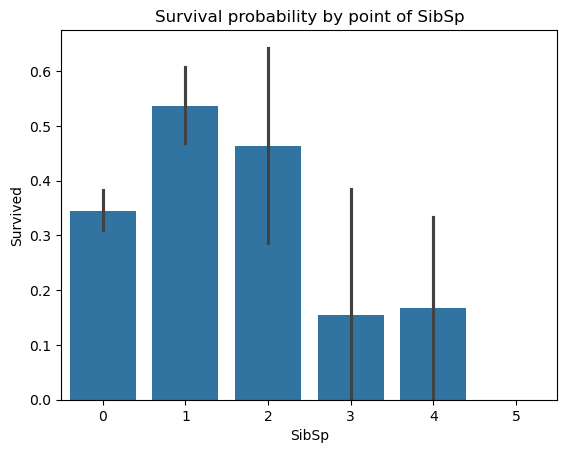

In [45]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.title('Survival probability by point of SibSp')

### Numerical variable: Parch

In [47]:
train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [48]:
# Mean of survival by parch
train[['Parch','Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival probability by point of Parch')

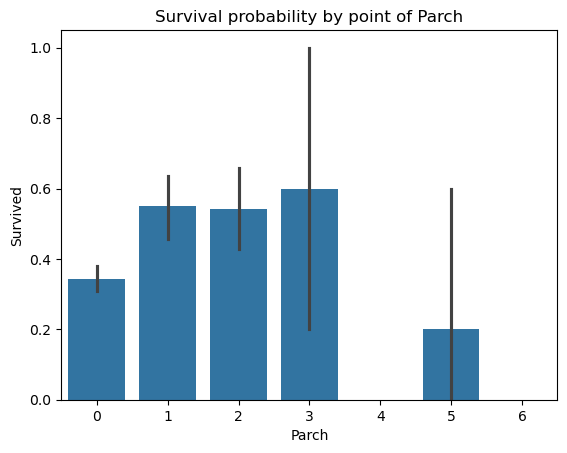

In [49]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)
plt.title('Survival probability by point of Parch')

### Numerical variable: Age

In [51]:
train['Age'].value_counts(dropna = False)

#Null values in age column

Age
NaN      170
24.00     29
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

Text(0.5, 1.0, 'Passenger Age Distribution')

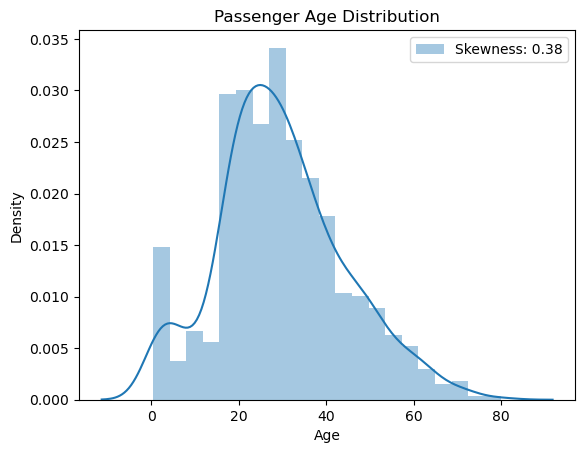

In [52]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

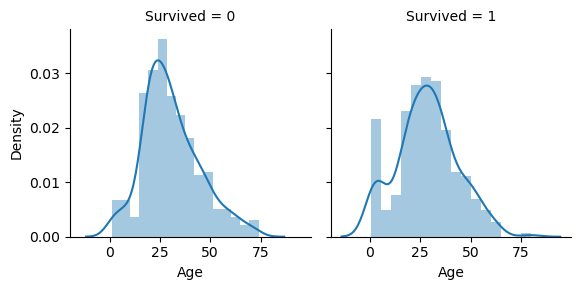

In [53]:
# Age distribution by survival

g = sns.FacetGrid(train, col ='Survived')
g.map(sns.distplot,'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

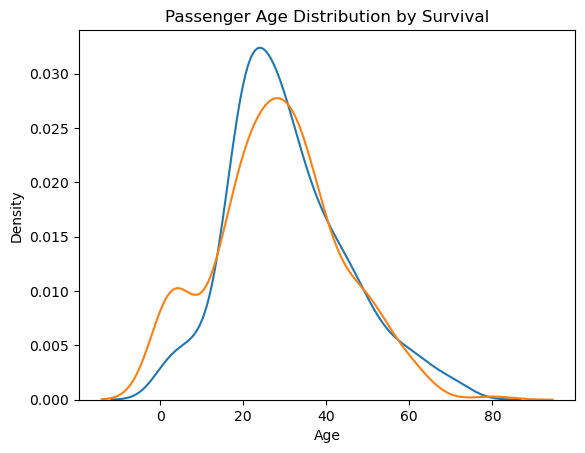

In [54]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.title('Passenger Age Distribution by Survival')

Passengers of younger ages especially children have a higher survival probabilty than the other passengers. So, concides with asper movie, where women and children were first during evacuation.

### Question 4: Dealing with null/missing values - Data preprocessing

In [57]:
# I decided to drop both ticket and cabin as they do not seem important for the analysis.

train = train.drop(['Ticket', 'Cabin'], axis=1)

In [58]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [59]:
# Computing most frequent value of Embarked 

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [60]:
# Filling missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

### Age has many null/missing values:

To fill missing values in the Age column, my goal is to use features that are most correlated with Age to predict the values for age. First, I will convert Sex into numerical values where 0 = male and 1 = female.

In [63]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

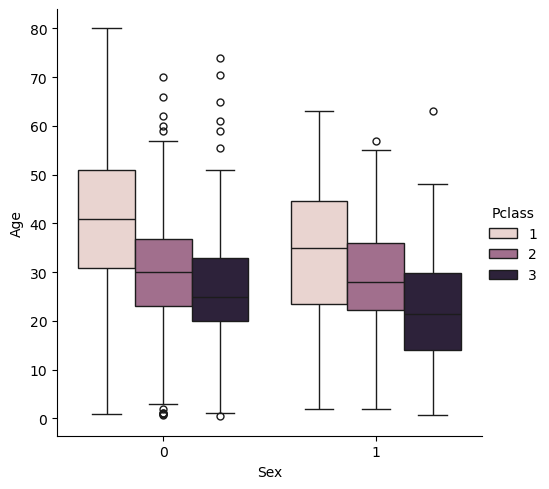

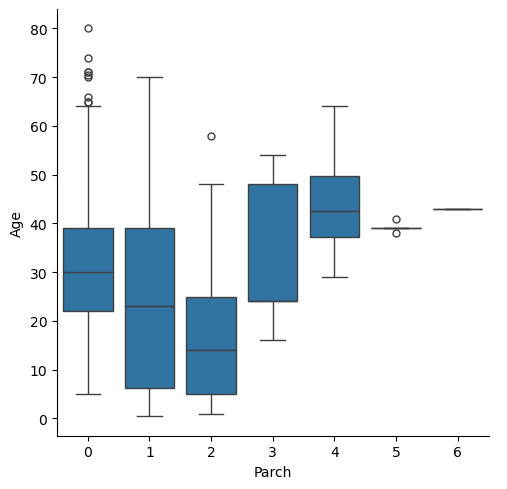

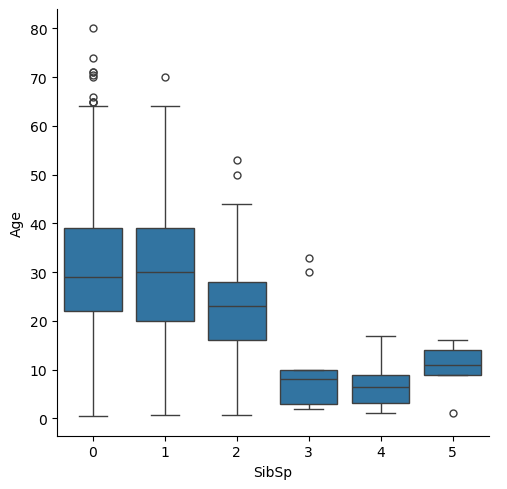

In [64]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = train)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = train)
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = train)

<Axes: >

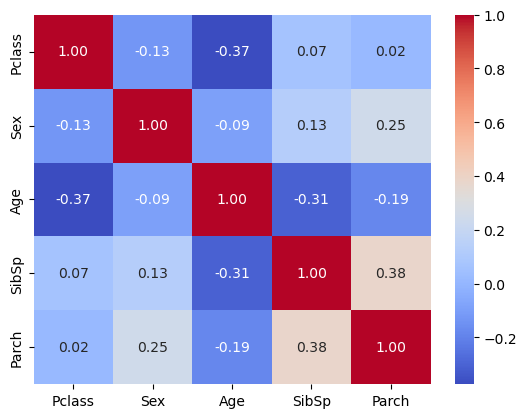

In [65]:
 sns.heatmap(train[['Pclass','Sex','Age','SibSp','Parch']].corr(), annot = True, fmt = '.2f' , cmap = 'coolwarm')


Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass.

In [67]:
# Check number of missing ages

age_nan_indices = list(train[train['Age'].isnull()].index)
len(age_nan_indices)

170

In [68]:
# Looping through each missing age in the list to locate the rows that have the same SibSp, Parch and Pclass values and fill the missing age with the median of those rows. If rows are not found, filling missing age with the median of the entire Age column.

for index in age_nan_indices:
    median_age = train['Age'].median()
    predict_age = train['Age'][(train['SibSp'] == train.iloc[index]['SibSp'])
                            & (train['Parch'] == train.iloc[index]['Parch'])
                            & (train['Pclass'] == train.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        train['Age'].iloc[index] = median_age
    else:
        train['Age'].iloc[index] = predict_age

In [69]:
# making sure there is no missing age values

train['Age'].isnull().sum()

0

### Addressing skewness of the Fare column

Text(0.5, 1.0, 'Passenger Fare Distribution')

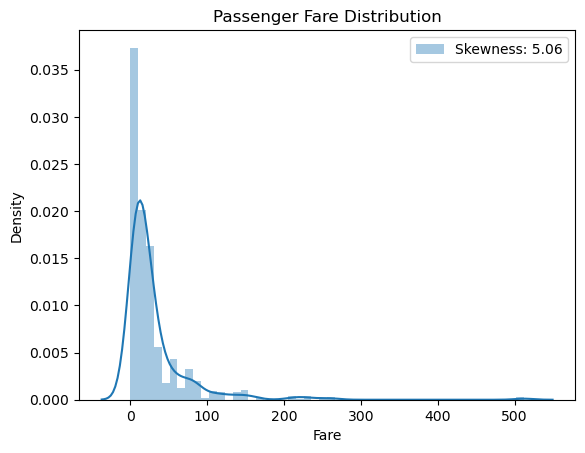

In [71]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [72]:
# log transformation to fare column to reduce skewness

train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution after Log transformation')

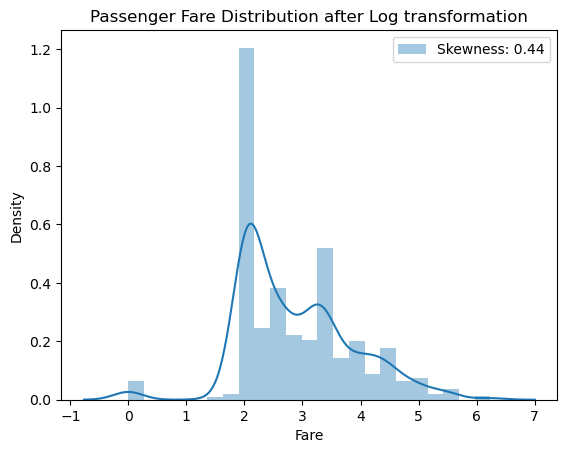

In [73]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution after Log transformation')

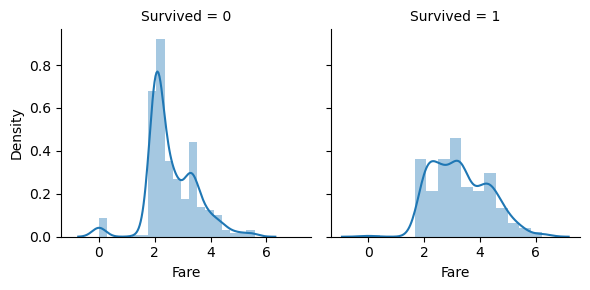

In [74]:
# Fare distribution by survival

g1 = sns.FacetGrid(train, col ='Survived')
g1.map(sns.distplot,'Fare')

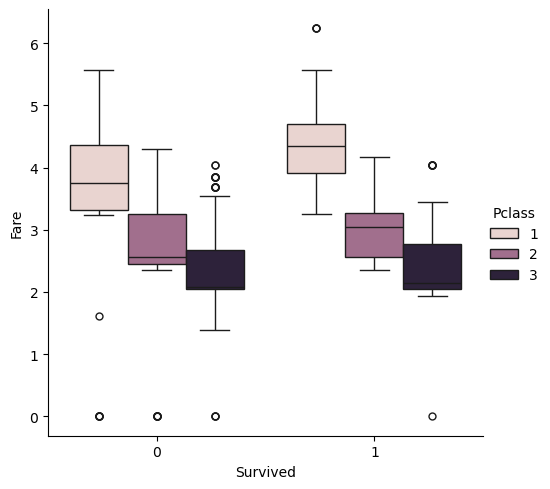

In [75]:
sns.catplot(y = 'Fare', x = 'Survived', hue = 'Pclass', kind = 'box', data = train)

### Question 3: Feature engineering

I am constructing 3 new features:
 - Title
 - isAlone
 - Age_Class

### Title

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [79]:
# get title from name

train['Title'] = [name.split(',')[1].split('.')[0].strip() for name in train['Name']]
train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [80]:
# value counts of title

train['Title'].value_counts()

Title
Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [81]:
train['Title'].nunique()

17

In [82]:
# Simplify title

train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major','Lady', 'Don', 'Jonkheer', 'Capt', 'the Countess', 'Sir','Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

<Axes: xlabel='Title', ylabel='count'>

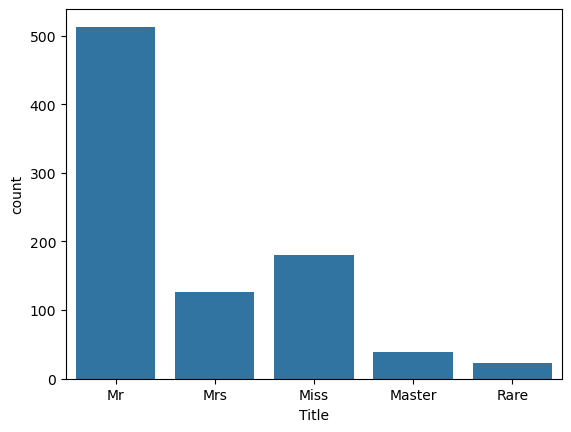

In [83]:
sns.countplot(x=train['Title'], orient='h')

In [84]:
train[['Title','Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean survival by Title')

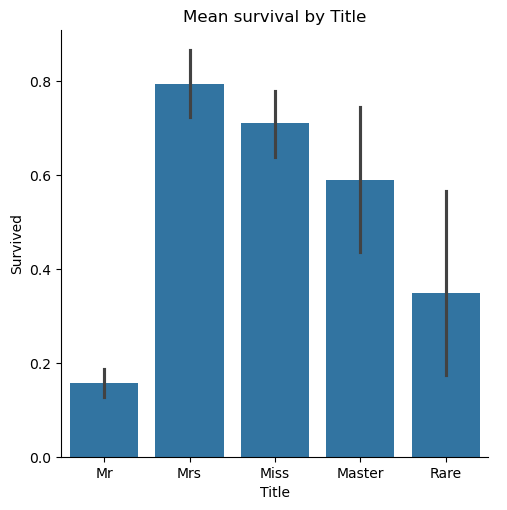

In [85]:
sns.catplot(x='Title',y='Survived',data=train,kind='bar')
plt.title('Mean survival by Title')

In [86]:
# Drop name column

train = train.drop('Name', axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1,3,1,26.0,0,0,2.070022,S,Miss
3,4,1,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0,3,0,35.0,0,0,2.085672,S,Mr


We can see from the graph above, women, both married as well as single have substially higher survival rate than men.

### isAlone

In [89]:
# Calculate family size from SibSp and Parch

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [90]:
# Mean of survival by family size

train[['FamilySize','Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by ='Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [91]:
# Create isAlone feature

train['isAlone'] = 0
train.loc[train['FamilySize'] == 1, 'isAlone'] = 1

In [92]:
train[['isAlone','Survived']].groupby('isAlone', as_index = False).mean().sort_values(by ='Survived', ascending = False)

,isAlone,Survived
0,0,0.514535
1,1,0.303538


In [93]:
# drop SibSp, Parch and FamilySize features from the dataframe

train = train.drop(['SibSp','Parch','FamilySize'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,1,0,3,0,22.0,1.981001,S,Mr,0
1,2,1,1,1,38.0,4.266662,C,Mrs,0
2,3,1,3,1,26.0,2.070022,S,Miss,1
3,4,1,1,1,35.0,3.972177,S,Mrs,0
4,5,0,3,0,35.0,2.085672,S,Mr,1


We can see that passengers who came alone have a lower survival rate compared to those who came with family.

### Age_Class

In [96]:
train['AgeBand'] = pd.cut(train['Age'],5)
train[['AgeBand','Survived']].groupby('AgeBand', as_index = False).mean().sort_values(by ='AgeBand')

,AgeBand,Survived
0,"(0.34, 16.336]",0.518868
1,"(16.336, 32.252]",0.343816
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


First I am transforming Age into an ordinal variable.
Grouping Ages into 5 separate age bands and assigning a number to each age band

In [98]:
# assign ordinals to each age band

train.loc[train['Age'] <= 16.336, 'Age'] = 0
train.loc[(train['Age'] > 16.336) & (train['Age'] <= 32.252), 'Age'] = 1
train.loc[(train['Age'] > 32.252) & (train['Age'] <= 48.168), 'Age'] = 2
train.loc[(train['Age'] > 48.168) & (train['Age'] <= 64.084), 'Age'] = 3
train.loc[train['Age'] > 64.084, 'Age'] = 4

In [99]:
# drop age band feature

train = train.drop('AgeBand', axis = 1)

In [100]:
train[['Age','Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [101]:
# convert ordinal age into integer

train['Age'] = train['Age'].astype('int')
train['Age'].dtype

dtype('int32')

In [102]:
# Create Age_Class feature

train['Age_Class'] = train['Age'] * train['Pclass']
train[['Age','Pclass','Age_Class']].head()

,Age,Pclass,Age_Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


Text(0.5, 1.0, 'Survival probability by Age_Class')

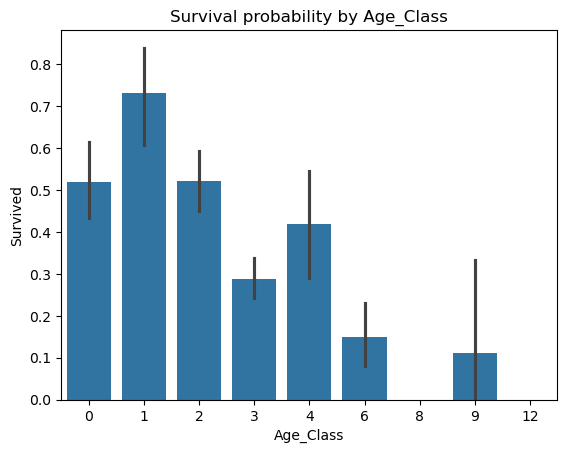

In [103]:
sns.barplot(x = 'Age_Class', y = 'Survived', data = train)
plt.title('Survival probability by Age_Class')

From this graph, we can see that younger group of passengers who are also of the higher class have a much higher survival rate compared to those of older age and lower class.